<a href="https://colab.research.google.com/github/shearere2/Miscellaneous/blob/main/Shearer_Homework3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Question 1

In [1]:
samples = c()
for (i in 1:10000){
    n = rpois(n=1, lambda=2)
    samples = c(samples, rbinom(n=1, p=0.51, size=n))
}

In [15]:
# Part A
cat((sum(samples == 0) / length(samples)) * 100)
cat('% of families have 0 boys.')

35.55% of families have 0 boys.

In [16]:
# Part B
cat((sum(samples > 1) / length(samples)) * 100)
cat('% of families have 2 or more boys.')

27.81% of families have 2 or more boys.

In [19]:
# Part C
cat('On average, there are ')
cat(mean(samples))
cat(' boys per family.')

On average, there are 1.0348 boys per family.

Question 2

In [21]:
x_vals = c()
y_vals = c()
for (i in 1:25000){
  # Generate r^2 from Exp(0.5)
  r = sqrt(rexp(n=1, rate=0.5))

  # Generate theta from Unif(0, 2pi)
  theta = runif(n=1, min=0, max=2*pi)

  x = r*cos(theta)
  y = r*sin(theta)
  x_vals = c(x_vals, x)
  y_vals = c(y_vals, y)
}

In [22]:
# Part A
cat('P(X > Y) = ')
cat(sum(x_vals > y_vals) / 25000)

P(X > Y) = 0.49988

In [23]:
# Part B - i
cat('Using my X draws, P(-1.96 < X < 1.96) = ')
cat(length(x_vals[x_vals > -1.96 & x_vals < 1.96]) / 25000)

Using my X draws, P(-1.96 < X < 1.96) = 0.94936

In [24]:
# Part B - ii
draws = rnorm(n=50000)
cat('Using 50,000 draws from rnorm, P(-1.96 < X < 1.96) = ')
cat(sum(draws > -1.96 & draws < 1.96) / 50000)

Using 50,000 draws from rnorm, P(-1.96 < X < 1.96) = 0.95054

In [27]:
# Part B - iii
print('Finally, subtracting the theoretical probability of seeing a N(0,1) draw less than -1.96 ')
cat('from the theoretical probability of seeing a N(0,1) draw less than 1.96, ')
cat('P(-1.96 < X < 1.96) = ')
cat(pnorm(1.96) - pnorm(-1.96))

[1] "Finally, subtracting the theoretical probability of seeing a N(0,1) draw less than -1.96 "
from the theoretical probability of seeing a N(0,1) draw less than 1.96, P(-1.96 < X < 1.96) = 0.9500042

Question 3

In [11]:
gibbs_sampling = function(rho, x_0, num_iter){

  x_vals = c()
  y_vals = c()

  # Generate Y|X=x
  y = rnorm(n=1, mean=rho*x_0, sd=sqrt(1-(rho^2)))
  for (i in 1:num_iter){

    # Generate x_i: X|Y=y
    x = rnorm(n=1, mean=rho*y, sd=sqrt(1-(rho^2)))
    y = rnorm(n=1, mean=rho*x, sd=sqrt(1-(rho^2)))
    x_vals = c(x_vals, x)
    y_vals = c(y_vals, y)

  }
  return(list('x'=x_vals, 'y'=y_vals))
}

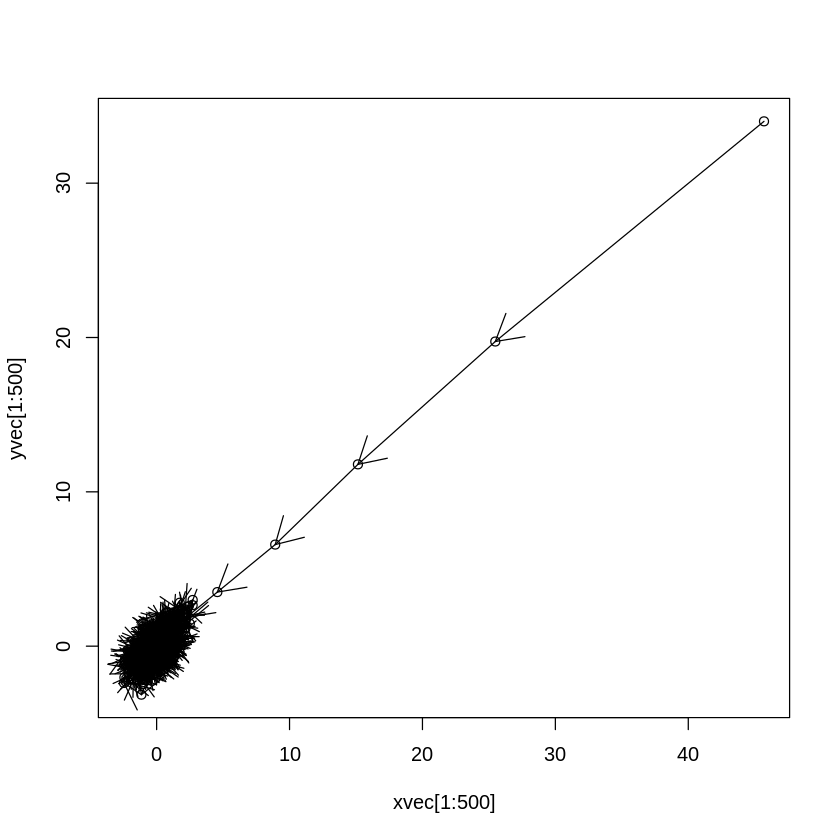

In [12]:
# Part a
samples = gibbs_sampling(rho=0.75, x_0=80, num_iter=500)
xvec = samples$x
yvec = samples$y

plot(xvec[1:500], yvec[1:500])
arrows(xvec[1:499], yvec[1:499], xvec[2:500], yvec[2:500])

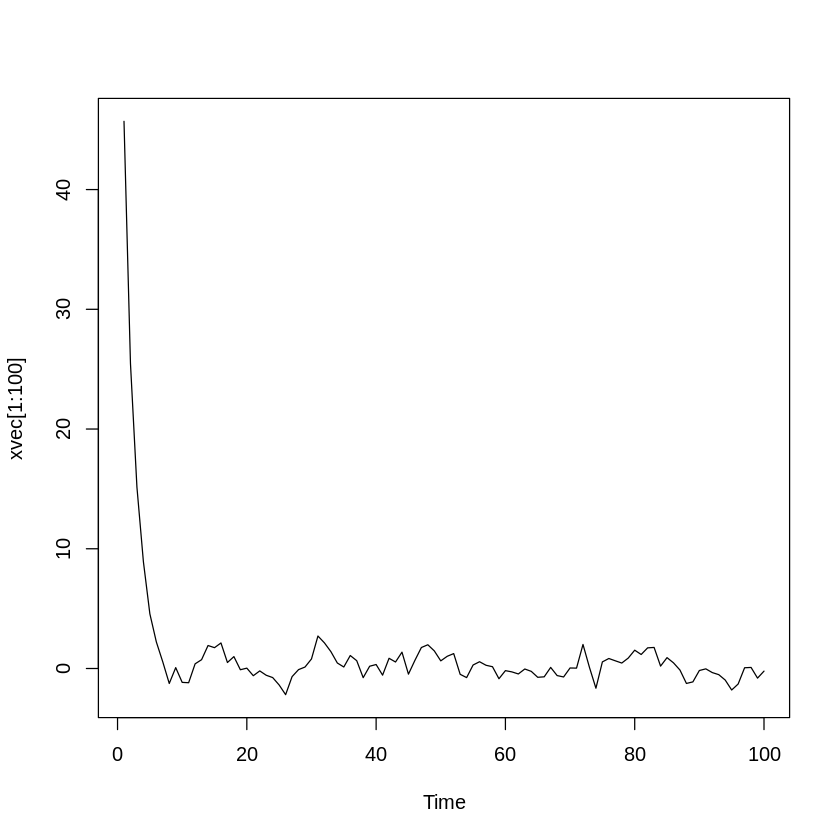

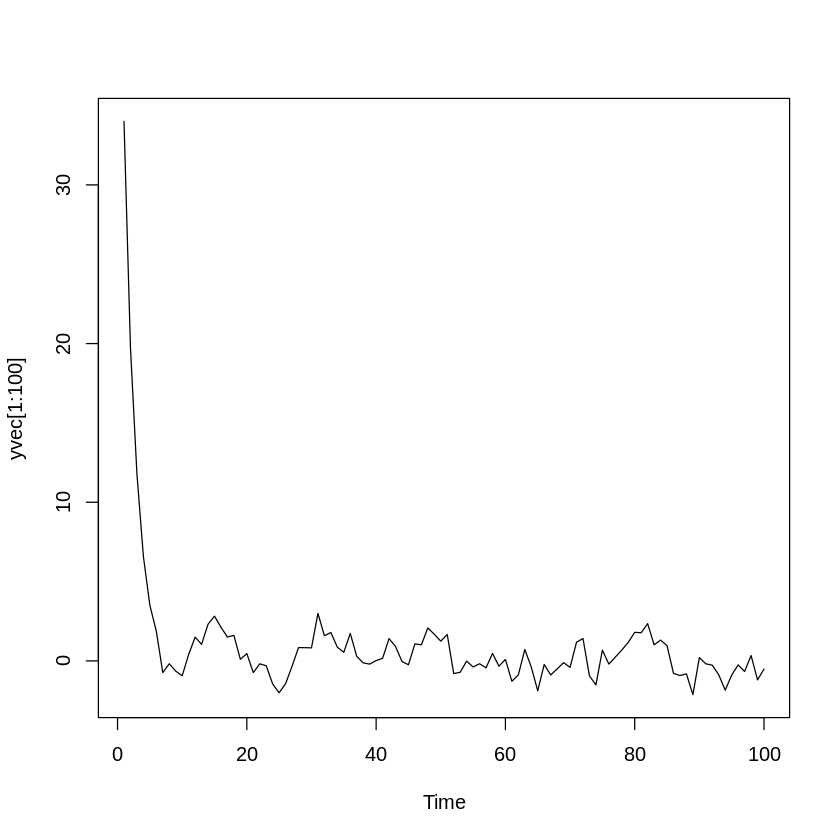

In [13]:
# Part b
ts.plot(xvec[1:100])
ts.plot(yvec[1:100])

In [14]:
# Part b, continued
# Burn-in: 50 iterations to be safe
xvec = xvec[50:length(xvec)]
yvec = yvec[50:length(yvec)]

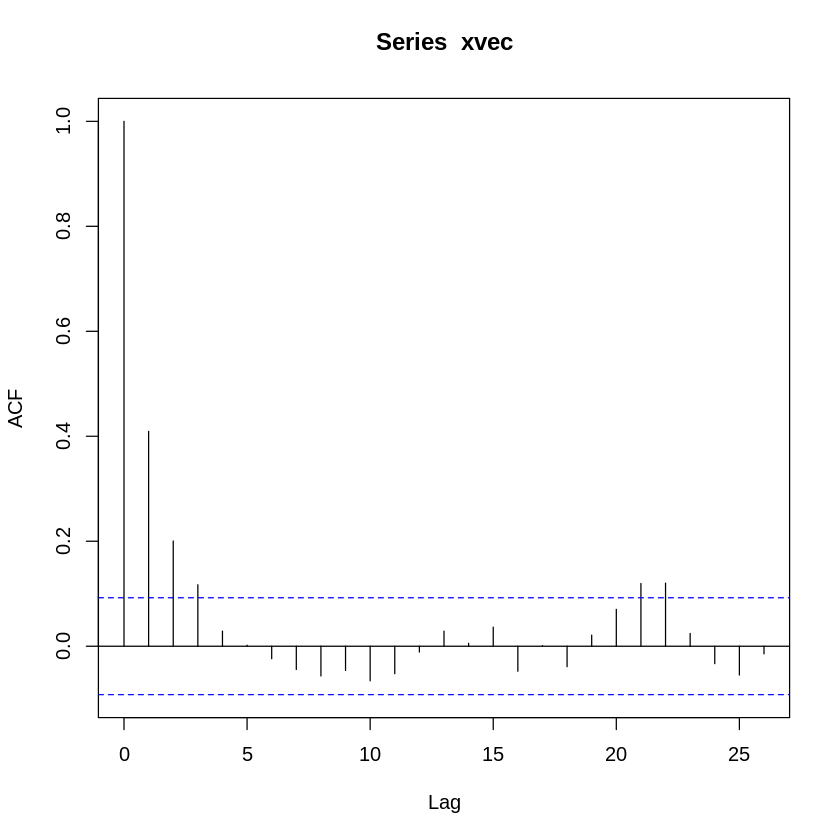

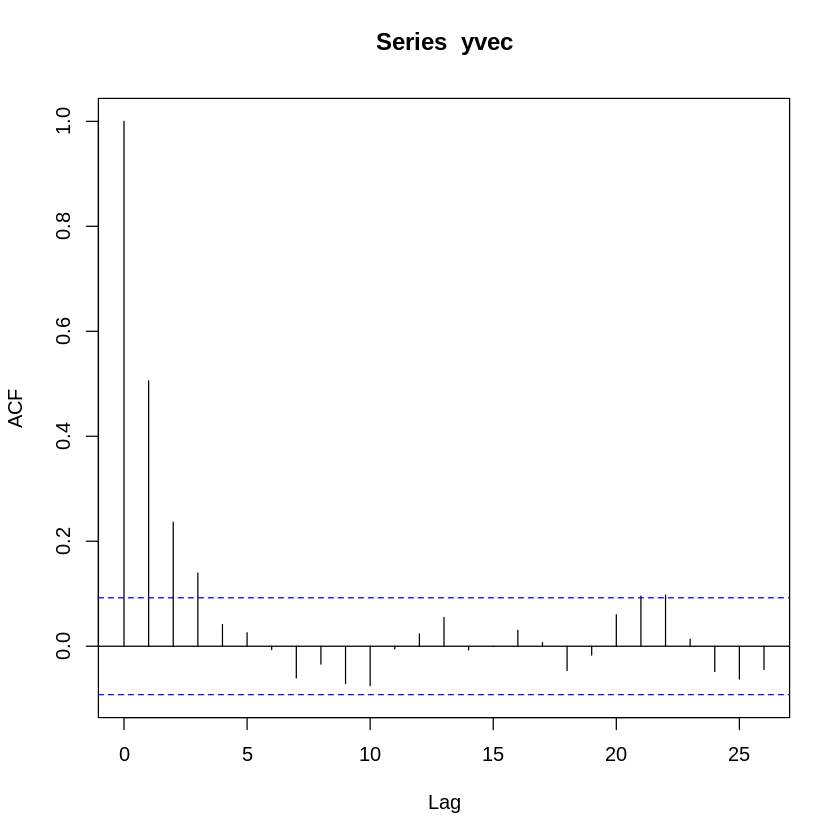

In [15]:
# Part c
acf(xvec)
acf(yvec)

In [16]:
# Selecting a lag of 5
xvec_wlag = xvec[c(rep(F, 4), T)]
yvec_wlag = yvec[c(rep(F, 4), T)]

length(xvec_wlag)

[1] 90

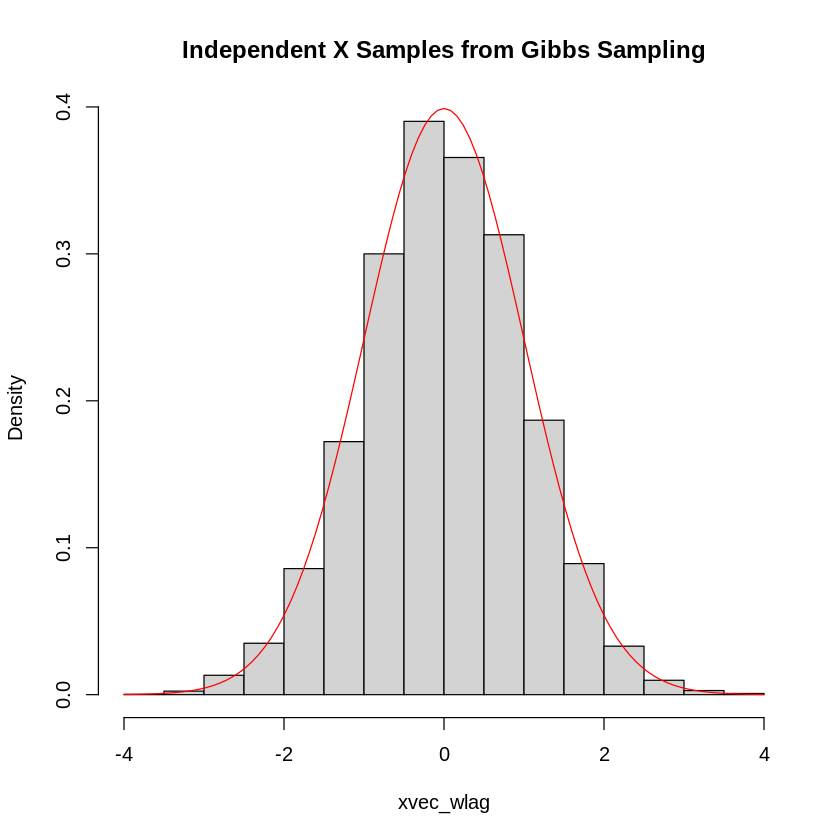

In [21]:
# Part d
# (500-50)/5 = (total - burnin) / lag = 75 realizations
# 10000 = (total - 50) / 5
# 50000 = total - 50
# total = 50050
# General equation: total = (wanted*lag) + burnin
samples = gibbs_sampling(rho=0.75, x_0=80, num_iter=50050)
xvec = samples$x
yvec = samples$y
xvec = xvec[50:length(xvec)]
yvec = yvec[50:length(yvec)]
xvec_wlag = xvec[c(rep(F, 4), T)]
yvec_wlag = yvec[c(rep(F, 4), T)]
hist(xvec_wlag, probability=T, main='Independent X Samples from Gibbs Sampling')
curve(dnorm(x), add=T, col='red')

Question 4

In [18]:
# Takes 6 minutes to execute
nums = seq(-1,1,0.1)
probs = c()
for (i in nums){
  samples = gibbs_sampling(rho=i, x_0=80, num_iter=75050)
  xvec = samples$x
  yvec = samples$y
  xvec = xvec[50:length(xvec)]
  yvec = yvec[50:length(yvec)]
  xvec_wlag = xvec[c(rep(F, 4), T)]
  yvec_wlag = yvec[c(rep(F, 4), T)]
  cat('rho = ')
  cat(i)
  cat(': P(X>0 and Y>0) = ')
  prob = sum(xvec_wlag > 0 & yvec_wlag > 0) / length(xvec_wlag)
  probs = c(probs, prob)
  cat(prob)
  print('')
}

rho = -1: P(X>0 and Y>0) = 0[1] ""
rho = -0.9: P(X>0 and Y>0) = 0.07313333[1] ""
rho = -0.8: P(X>0 and Y>0) = 0.1008[1] ""
rho = -0.7: P(X>0 and Y>0) = 0.1224[1] ""
rho = -0.6: P(X>0 and Y>0) = 0.1477333[1] ""
rho = -0.5: P(X>0 and Y>0) = 0.1674[1] ""
rho = -0.4: P(X>0 and Y>0) = 0.1828667[1] ""
rho = -0.3: P(X>0 and Y>0) = 0.2023333[1] ""
rho = -0.2: P(X>0 and Y>0) = 0.2156[1] ""
rho = -0.1: P(X>0 and Y>0) = 0.2370667[1] ""
rho = 0: P(X>0 and Y>0) = 0.2477333[1] ""
rho = 0.1: P(X>0 and Y>0) = 0.2696[1] ""
rho = 0.2: P(X>0 and Y>0) = 0.2803333[1] ""
rho = 0.3: P(X>0 and Y>0) = 0.2973333[1] ""
rho = 0.4: P(X>0 and Y>0) = 0.318[1] ""
rho = 0.5: P(X>0 and Y>0) = 0.3273333[1] ""
rho = 0.6: P(X>0 and Y>0) = 0.3524667[1] ""
rho = 0.7: P(X>0 and Y>0) = 0.3800667[1] ""
rho = 0.8: P(X>0 and Y>0) = 0.4034667[1] ""
rho = 0.9: P(X>0 and Y>0) = 0.4359333[1] ""
rho = 1: P(X>0 and Y>0) = 1[1] ""


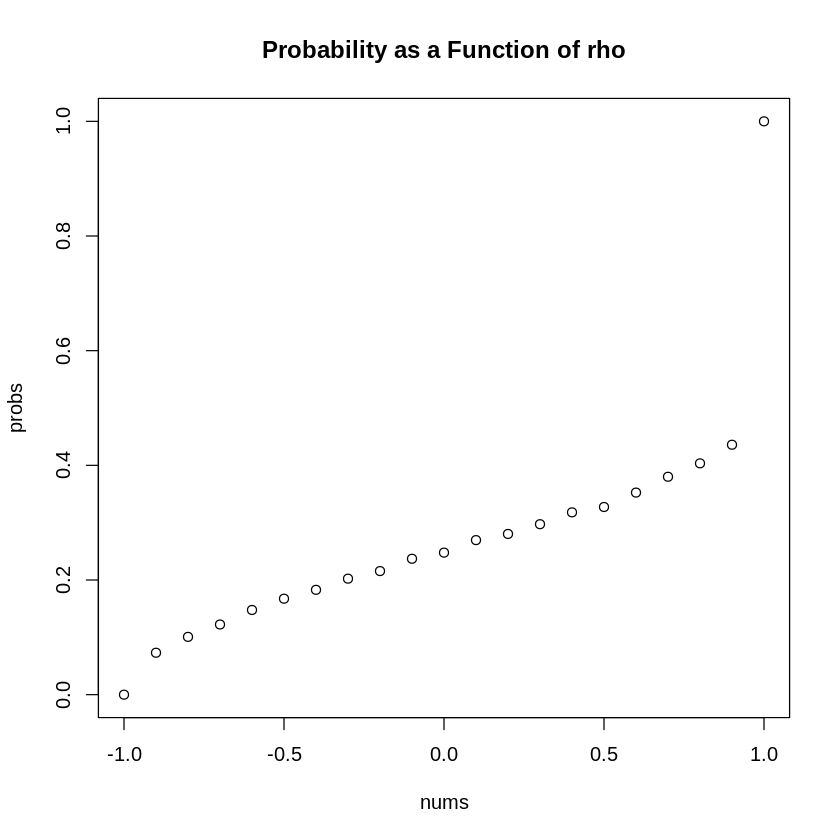

In [20]:
plot(nums, probs, main='Probability as a Function of rho')